### Packages Required

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
import scipy.stats as stats
import pandas_profiling
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

### Datasets

In [50]:
df = pd.read_csv('C:/Users/Nithin/Downloads/Segementation_Scientific/beer.txt',sep=" ")
df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [56]:
del df['name']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calories  20 non-null     int64  
 1   sodium    20 non-null     int64  
 2   alcohol   20 non-null     float64
 3   cost      20 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 768.0 bytes


<AxesSubplot:>

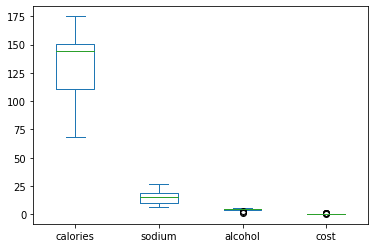

In [52]:
#Outlier
df.plot(kind='box')

### Standardisation of data

In [58]:
sc = StandardScaler()

sc_model = sc.fit(df)
df_scale = sc_model.transform(df)
df_scale = pd.DataFrame(df_scale,columns=list(df.columns))
df_scale

,calories,sodium,alcohol,cost
0,0.387913,0.007795,0.433808,-0.456830
1,0.625066,0.631369,0.622420,-0.456830
2,0.828339,0.007795,-3.149822,-0.102698
3,1.268765,-1.239354,0.905338,1.667960
4,0.658944,-0.615780,0.716726,1.951265
5,0.421792,1.254943,0.339502,-1.519224
6,1.438159,1.410837,1.188256,-0.669309
7,0.557308,1.878518,0.433808,-0.527656
8,-1.136637,-0.771673,0.056584,-0.456830
9,-0.662332,-1.083460,-0.509253,-0.669309


##### Visualization

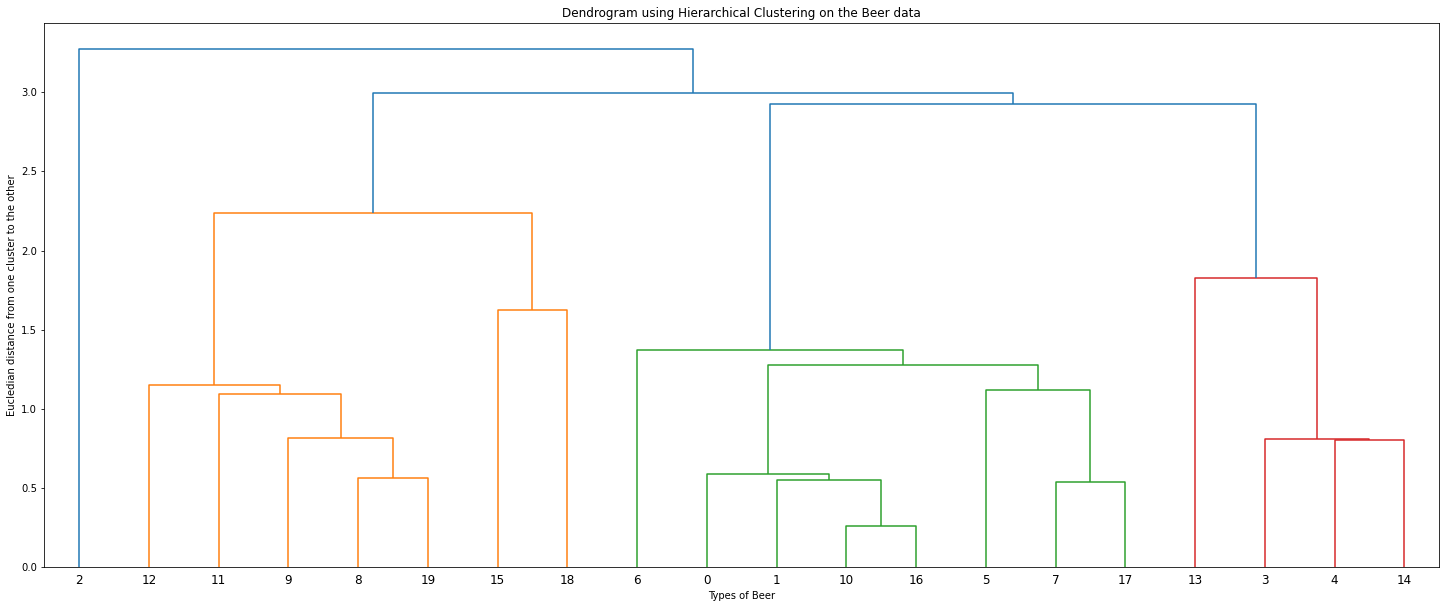

In [60]:
V = hierarchy.linkage(df_scale,method='median')
plt.figure(figsize=(25,10))
V_Dendro = hierarchy.dendrogram(V)
plt.title('Dendrogram using Hierarchical Clustering on the Beer data')
plt.xlabel('Types of Beer')
plt.ylabel('Eucledian distance from one cluster to the other')
plt.show()

### AGNES

In [63]:
ags = AgglomerativeClustering(n_clusters=3)
ags = ags.fit(df_scale)
ags_labels = pd.Series(ags.labels_)

In [64]:
round(ags_labels.value_counts().sort_index()/len(df_scale)*100,2)

0    40.0
1    40.0
2    20.0
dtype: float64

In [65]:
df['AGNES_labels'] = ags_labels

In [66]:
df2 = df[df.AGNES_labels != -1]
df2

,calories,sodium,alcohol,cost,AGNES_labels
0,144,15,4.7,0.43,1
1,151,19,4.9,0.43,1
2,157,15,0.9,0.48,0
3,170,7,5.2,0.73,2
4,152,11,5.0,0.77,2
5,145,23,4.6,0.28,1
6,175,24,5.5,0.40,1
7,149,27,4.7,0.42,1
8,99,10,4.3,0.43,0
9,113,8,3.7,0.40,0
